# Data Cleaning:

---

Data cleaning was executed to resolve data quality issues through deduplication, type correction, missing value handling, categorical normalization, and outlier treatment. The result is a standardized, analysis-ready dataset suitable for feature engineering, analytics, and modeling workflows.

### Objective:
Apply corrections identified during quality assessment to ensure a reliable analytical dataset.

---

### Tasks:

- Remove duplicate rows
- Handle missing values
- Drop only when justified
- Impute using mean/median/forward fill when appropriate
- Standardize field naming convention
- Convert to snake_case
- Normalize categorical values
- Example: unify case and spelling:
    - “fb”, “FB”, “Facebook” to Facebook
    - Address outliers
- Remove, cap, or transform based on statistical justification
- Save cleaned dataset to /data/processed/marketing_campaigns_cleaned.csv



### Outcome:

A consistent, analysis-ready dataset to support feature engineering, EDA, and modeling

---

## Ingest Data:

### Import Libraries:

In [788]:
#Libraries
    
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns

### Ingest Data as DF:

In [789]:
#LOAD DATA
#LOAD 1ST CSV - 2024 FILE

# df1 = pd.read_csv("../data/raw/marketing_campaign_2024.csv")
# df2 = pd.read_csv("../data/raw/marketing_campaign_2025.csv")
df3 = pd.read_csv("../data/raw/marketing_campaign_jul_dec_2024.csv")


df4 = pd.read_csv("../data/processed/marketing_campaign_all_interim.csv")

### Brief Overview:

In [790]:
print("Combined dataset shape: ", df4.shape)
print(df.info())
print(df.describe())
df4.head(10)

Combined dataset shape:  (1000, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1831 entries, 0 to 1830
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   campaign_id             1831 non-null   object        
 1   campaign_name           1831 non-null   object        
 2   start_date              1831 non-null   datetime64[ns]
 3   end_date                1831 non-null   datetime64[ns]
 4   channel                 1831 non-null   object        
 5   region                  1831 non-null   object        
 6   impressions             1831 non-null   int64         
 7   clicks                  1831 non-null   int64         
 8   conversions             1831 non-null   int64         
 9   spend_usd               1831 non-null   float64       
 10  revenue_usd             1831 non-null   float64       
 11  target_audience         1831 non-null   object        
 12  product_cate

,campaign_id,campaign_name,start_date,end_date,channel,region,impressions,clicks,conversions,spend_usd,revenue_usd,target_audience,product_category,device,year,data_source
0,2024_0001,Campaign_2024_0001,2024-05-16,2024-08-16,Search,South America,28252,5609,65466,39193.43,79017.74,Youth,Electronics,Desktop,2024,H1_2024
1,2024_0002,Campaign_2024_0002,2024-04-06,2024-10-13,Search,Asia,89608,83584,26865,17291.53,49868.54,Adults,Home,Mobile,2024,H1_2024
2,2024_0003,Campaign_2024_0003,2024-05-08,2024-11-27,Social,Europe,37853,62661,43662,6729.63,63021.28,Seniors,Electronics,Desktop,2024,H1_2024
3,2024_0004,Campaign_2024_0004,2024-01-28,2024-08-03,Display,Africa,10577,41421,75023,15077.58,133106.71,Seniors,Clothing,Desktop,2024,H1_2024
4,2024_0005,Campaign_2024_0005,2024-02-06,2024-08-23,Social,Asia,84039,56010,11283,16877.69,144736.99,Adults,Home,Mobile,2024,H1_2024
5,2024_0006,Campaign_2024_0006,2024-02-11,2024-12-19,Search,Europe,46728,87560,69277,6698.46,105523.82,Adults,Travel,Mobile,2024,H1_2024
6,2024_0007,Campaign_2024_0007,2024-05-07,2024-09-03,Search,Asia,24269,4485,39619,8269.18,113563.46,Seniors,Home,Mobile,2024,H1_2024
7,2024_0008,Campaign_2024_0008,2024-03-01,2024-09-13,Search,South America,45499,20267,8609,4110.73,59552.89,Seniors,Home,Desktop,2024,H1_2024
8,2024_0009,Campaign_2024_0009,2024-03-15,2024-07-31,Print,Asia,14398,79811,62095,14214.98,74892.62,Adults,Services,Mobile,2024,H1_2024
9,2024_0010,Campaign_2024_0010,2024-03-07,2024-10-15,Social,Africa,18278,57806,55147,17466.57,38287.83,Youth,Home,Mobile,2024,H1_2024


## marketing_campaign_jul_dec_2024:

In [791]:
df3.info()
df3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 831 entries, 0 to 830
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   campaign_id       831 non-null    object 
 1   campaign_name     831 non-null    object 
 2   start_date        831 non-null    object 
 3   end_date          831 non-null    object 
 4   channel           831 non-null    object 
 5   region            831 non-null    object 
 6   impressions       831 non-null    int64  
 7   clicks            831 non-null    int64  
 8   conversions       831 non-null    int64  
 9   spend_usd         831 non-null    float64
 10  revenue_usd       831 non-null    float64
 11  target_audience   831 non-null    object 
 12  product_category  831 non-null    object 
 13  device            831 non-null    object 
 14  year              831 non-null    int64  
dtypes: float64(2), int64(4), object(9)
memory usage: 97.5+ KB


,campaign_id,campaign_name,start_date,end_date,channel,region,impressions,clicks,conversions,spend_usd,revenue_usd,target_audience,product_category,device,year
0,2024_JD_0003,Campaign_2024_JD_0003,7/2/2024,10/12/2024,Email,Asia,199027,25323,2686,9909.42,16071.40,Seniors,Automotive,Mobile,2024
1,2024_JD_0335,Campaign_2024_JD_0335,11/9/2024,12/31/2024,Print,Africa,199018,23717,2092,40203.48,73822.04,Seniors,Electronics,Desktop,2024
2,2024_JD_0642,Campaign_2024_JD_0642,11/9/2024,12/31/2024,Print,Africa,199018,23717,2092,40203.48,73822.04,Seniors,Electronics,Desktop,2024
3,2024_JD_0034,Campaign_2024_JD_0034,8/6/2024,12/31/2024,Email,North America,197506,9133,2147,14664.70,41219.88,Adults,Electronics,Mobile,2024
4,2024_JD_0022,Campaign_2024_JD_0022,11/6/2024,12/31/2024,Print,Europe,197445,8750,1059,43175.80,57751.47,Adults,Home,Mobile,2024


#### Date Coverage:

In [792]:
print(df3["start_date"].min())
print(df3["start_date"].max())


10/1/2024
9/9/2024


In [793]:
df3['start_date'] = pd.to_datetime(df3['start_date'], errors='coerce')
df3['end_date'] = pd.to_datetime(df3['end_date'], errors='coerce')

In [794]:
print(df3["start_date"].min())
print(df3["start_date"].max())


2024-07-01 00:00:00
2024-12-30 00:00:00


In [795]:
df3.info()
df3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 831 entries, 0 to 830
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   campaign_id       831 non-null    object        
 1   campaign_name     831 non-null    object        
 2   start_date        831 non-null    datetime64[ns]
 3   end_date          831 non-null    datetime64[ns]
 4   channel           831 non-null    object        
 5   region            831 non-null    object        
 6   impressions       831 non-null    int64         
 7   clicks            831 non-null    int64         
 8   conversions       831 non-null    int64         
 9   spend_usd         831 non-null    float64       
 10  revenue_usd       831 non-null    float64       
 11  target_audience   831 non-null    object        
 12  product_category  831 non-null    object        
 13  device            831 non-null    object        
 14  year              831 non-

,campaign_id,campaign_name,start_date,end_date,channel,region,impressions,clicks,conversions,spend_usd,revenue_usd,target_audience,product_category,device,year
0,2024_JD_0003,Campaign_2024_JD_0003,2024-07-02,2024-10-12,Email,Asia,199027,25323,2686,9909.42,16071.40,Seniors,Automotive,Mobile,2024
1,2024_JD_0335,Campaign_2024_JD_0335,2024-11-09,2024-12-31,Print,Africa,199018,23717,2092,40203.48,73822.04,Seniors,Electronics,Desktop,2024
2,2024_JD_0642,Campaign_2024_JD_0642,2024-11-09,2024-12-31,Print,Africa,199018,23717,2092,40203.48,73822.04,Seniors,Electronics,Desktop,2024
3,2024_JD_0034,Campaign_2024_JD_0034,2024-08-06,2024-12-31,Email,North America,197506,9133,2147,14664.70,41219.88,Adults,Electronics,Mobile,2024
4,2024_JD_0022,Campaign_2024_JD_0022,2024-11-06,2024-12-31,Print,Europe,197445,8750,1059,43175.80,57751.47,Adults,Home,Mobile,2024


#### Column Standardization DF3:¶

In [796]:

for d in [df3]:
    d.columns = (
        d.columns.str.lower()
        .str.strip()
        .str.replace(" ", "_")
    )

#### Add Dataset Source Column:

In [797]:
# Data Source - "jul_dec_2024"

# df3["data_source"] = "jul_dec_2024"

df3["data_source"] = "H2_2024"

In [798]:
print(df3["data_source"].head())
print(df3["data_source"].tail()) # NO 2025 DATA HERE LOOKS GOOD TO ME

0    H2_2024
1    H2_2024
2    H2_2024
3    H2_2024
4    H2_2024
Name: data_source, dtype: object
826    H2_2024
827    H2_2024
828    H2_2024
829    H2_2024
830    H2_2024
Name: data_source, dtype: object


In [799]:
df3.shape

(831, 16)

In [800]:
df4.shape

(1000, 16)

## Concatenation of Dataset:

In [801]:
df = pd.concat([df4, df3], ignore_index=True)

### Validate:

In [802]:
#validate

df["data_source"].value_counts()
df.shape


(1831, 16)

In [803]:
#The result

print("Combined dataset shape: ", df.shape)
print(df.info())
print(df.describe())
df.head(10)

Combined dataset shape:  (1831, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1831 entries, 0 to 1830
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   campaign_id       1831 non-null   object 
 1   campaign_name     1831 non-null   object 
 2   start_date        1831 non-null   object 
 3   end_date          1831 non-null   object 
 4   channel           1831 non-null   object 
 5   region            1831 non-null   object 
 6   impressions       1831 non-null   int64  
 7   clicks            1831 non-null   int64  
 8   conversions       1831 non-null   int64  
 9   spend_usd         1831 non-null   float64
 10  revenue_usd       1831 non-null   float64
 11  target_audience   1831 non-null   object 
 12  product_category  1831 non-null   object 
 13  device            1831 non-null   object 
 14  year              1831 non-null   int64  
 15  data_source       1831 non-null   object 
dtypes: flo

,campaign_id,campaign_name,start_date,end_date,channel,region,impressions,clicks,conversions,spend_usd,revenue_usd,target_audience,product_category,device,year,data_source
0,2024_0001,Campaign_2024_0001,2024-05-16,2024-08-16,Search,South America,28252,5609,65466,39193.43,79017.74,Youth,Electronics,Desktop,2024,H1_2024
1,2024_0002,Campaign_2024_0002,2024-04-06,2024-10-13,Search,Asia,89608,83584,26865,17291.53,49868.54,Adults,Home,Mobile,2024,H1_2024
2,2024_0003,Campaign_2024_0003,2024-05-08,2024-11-27,Social,Europe,37853,62661,43662,6729.63,63021.28,Seniors,Electronics,Desktop,2024,H1_2024
3,2024_0004,Campaign_2024_0004,2024-01-28,2024-08-03,Display,Africa,10577,41421,75023,15077.58,133106.71,Seniors,Clothing,Desktop,2024,H1_2024
4,2024_0005,Campaign_2024_0005,2024-02-06,2024-08-23,Social,Asia,84039,56010,11283,16877.69,144736.99,Adults,Home,Mobile,2024,H1_2024
5,2024_0006,Campaign_2024_0006,2024-02-11,2024-12-19,Search,Europe,46728,87560,69277,6698.46,105523.82,Adults,Travel,Mobile,2024,H1_2024
6,2024_0007,Campaign_2024_0007,2024-05-07,2024-09-03,Search,Asia,24269,4485,39619,8269.18,113563.46,Seniors,Home,Mobile,2024,H1_2024
7,2024_0008,Campaign_2024_0008,2024-03-01,2024-09-13,Search,South America,45499,20267,8609,4110.73,59552.89,Seniors,Home,Desktop,2024,H1_2024
8,2024_0009,Campaign_2024_0009,2024-03-15,2024-07-31,Print,Asia,14398,79811,62095,14214.98,74892.62,Adults,Services,Mobile,2024,H1_2024
9,2024_0010,Campaign_2024_0010,2024-03-07,2024-10-15,Social,Africa,18278,57806,55147,17466.57,38287.83,Youth,Home,Mobile,2024,H1_2024


## The Columns:

### Chanel Standardization:

In [804]:
# CHANNEL STANDARDIZATION
# WELL REPLACED THOSE MANUAL TAGGING OF CHANNEL, I WILL MAKE RECOMENDATION TO UPDATE THAT EXCELL FILE THET ARE USING TOMORROW

channel_mapping = {
    "Search": "Google Ads",
    "Social": "Facebook Ads",
    "Display": "Google Display Network",
    "Print": "TikTok Ads",
    "Email": "Email"  # unchanged
}

# Apply mapping
df['channel'] = df['channel'].replace(channel_mapping)

In [805]:
# VALIDATE

print(df["channel"].unique())
df.head()

['Google Ads' 'Facebook Ads' 'Google Display Network' 'TikTok Ads' 'Email']


,campaign_id,campaign_name,start_date,end_date,channel,region,impressions,clicks,conversions,spend_usd,revenue_usd,target_audience,product_category,device,year,data_source
0,2024_0001,Campaign_2024_0001,2024-05-16,2024-08-16,Google Ads,South America,28252,5609,65466,39193.43,79017.74,Youth,Electronics,Desktop,2024,H1_2024
1,2024_0002,Campaign_2024_0002,2024-04-06,2024-10-13,Google Ads,Asia,89608,83584,26865,17291.53,49868.54,Adults,Home,Mobile,2024,H1_2024
2,2024_0003,Campaign_2024_0003,2024-05-08,2024-11-27,Facebook Ads,Europe,37853,62661,43662,6729.63,63021.28,Seniors,Electronics,Desktop,2024,H1_2024
3,2024_0004,Campaign_2024_0004,2024-01-28,2024-08-03,Google Display Network,Africa,10577,41421,75023,15077.58,133106.71,Seniors,Clothing,Desktop,2024,H1_2024
4,2024_0005,Campaign_2024_0005,2024-02-06,2024-08-23,Facebook Ads,Asia,84039,56010,11283,16877.69,144736.99,Adults,Home,Mobile,2024,H1_2024


### Standardize Column Names:

In [806]:
# df1.columns = df1.columns.str.lower().str.strip().str.replace(' ', '_')
# df2.columns = df2.columns.str.lower().str.strip().str.replace(' ', '_')

# # for df in [df1, df2]:
# for df in [df]:
df.columns = (
        df.columns.str.lower()
        .str.strip()
        .str.replace(" ", "_")
    )



In [807]:
df.columns

Index(['campaign_id', 'campaign_name', 'start_date', 'end_date', 'channel',
       'region', 'impressions', 'clicks', 'conversions', 'spend_usd',
       'revenue_usd', 'target_audience', 'product_category', 'device', 'year',
       'data_source'],
      dtype='object')

### Remove duplicates:

In [808]:
#Remove Duplicates

# for df in [df1, df2]:
# for df in [df]:
df.drop_duplicates(subset=["campaign_id"], inplace=True)


In [809]:
# DUPLICATES 

duplicates = df[df['campaign_id'].duplicated()]
print("Duplicate campaign IDs:", len(duplicates))

Duplicate campaign IDs: 0


In [810]:
df['campaign_id'].duplicated().sum()

np.int64(0)

### Unique Values:

In [811]:
numbers = df.select_dtypes(include="number")
numbers.head()

,impressions,clicks,conversions,spend_usd,revenue_usd,year
0,28252,5609,65466,39193.43,79017.74,2024
1,89608,83584,26865,17291.53,49868.54,2024
2,37853,62661,43662,6729.63,63021.28,2024
3,10577,41421,75023,15077.58,133106.71,2024
4,84039,56010,11283,16877.69,144736.99,2024


In [812]:
numbers = df.select_dtypes(exclude="number")
numbers.head()

,campaign_id,campaign_name,start_date,end_date,channel,region,target_audience,product_category,device,data_source
0,2024_0001,Campaign_2024_0001,2024-05-16,2024-08-16,Google Ads,South America,Youth,Electronics,Desktop,H1_2024
1,2024_0002,Campaign_2024_0002,2024-04-06,2024-10-13,Google Ads,Asia,Adults,Home,Mobile,H1_2024
2,2024_0003,Campaign_2024_0003,2024-05-08,2024-11-27,Facebook Ads,Europe,Seniors,Electronics,Desktop,H1_2024
3,2024_0004,Campaign_2024_0004,2024-01-28,2024-08-03,Google Display Network,Africa,Seniors,Clothing,Desktop,H1_2024
4,2024_0005,Campaign_2024_0005,2024-02-06,2024-08-23,Facebook Ads,Asia,Adults,Home,Mobile,H1_2024


In [813]:
# Check for unique_values in columns for duplicates and posible wrong spelling 

unique_values1 = df["channel"].unique()
unique_values2 = df["region"].unique()
unique_values3 = df["target_audience"].unique()
unique_values4 = df["product_category"].unique()
unique_values5 = df["device"].unique()

print("channel Unique values:",       unique_values1)
print("region Unique values:",       unique_values2)
print("target_audience Unique values:",      unique_values3)
print("product_category Unique values:",       unique_values4)
print("device Unique values:",       unique_values5)

channel Unique values: ['Google Ads' 'Facebook Ads' 'Google Display Network' 'TikTok Ads' 'Email']
region Unique values: ['South America' 'Asia' 'Europe' 'Africa' 'North America']
target_audience Unique values: ['Youth' 'Adults' 'Seniors']
product_category Unique values: ['Electronics' 'Home' 'Clothing' 'Travel' 'Services' 'Automotive' 'Health']
device Unique values: ['Desktop' 'Mobile' 'Tablet']


## Fix data types:

### Convert Data types - Dates, Float & Numeric:

In [814]:
# update on date time data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1831 entries, 0 to 1830
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   campaign_id       1831 non-null   object 
 1   campaign_name     1831 non-null   object 
 2   start_date        1831 non-null   object 
 3   end_date          1831 non-null   object 
 4   channel           1831 non-null   object 
 5   region            1831 non-null   object 
 6   impressions       1831 non-null   int64  
 7   clicks            1831 non-null   int64  
 8   conversions       1831 non-null   int64  
 9   spend_usd         1831 non-null   float64
 10  revenue_usd       1831 non-null   float64
 11  target_audience   1831 non-null   object 
 12  product_category  1831 non-null   object 
 13  device            1831 non-null   object 
 14  year              1831 non-null   int64  
 15  data_source       1831 non-null   object 
dtypes: float64(2), int64(4), object(10)
memory

#### Date Convertion:

In [815]:
# for df in [df]:

df['start_date'] = pd.to_datetime(df['start_date'], errors='coerce')
df['end_date'] = pd.to_datetime(df['end_date'], errors='coerce')
df['year'] = pd.to_datetime(df['year'], errors='coerce')
df['spend_usd'] = pd.to_numeric(df['spend_usd'], errors='coerce')
df['revenue_usd'] = pd.to_numeric(df['revenue_usd'], errors='coerce')
    
# df['dataset_year'] = pd.to_datetime(df['dataset_year'], errors='coerce')


#### Date Chronological Validity:

In [816]:
# Look for invalid dates

invalid_dates = df[df['end_date'] < df['start_date']]
print(f"Invalid date ranges: {len(invalid_dates)}")

Invalid date ranges: 0


#### Date_Time Features:

In [817]:
# Time Features

df['campaign_duration_days'] = (df['end_date'] - df['start_date']).dt.days
df['month'] = df['start_date'].dt.month
df['quarter'] = df['start_date'].dt.quarter


In [818]:
# Observe changes in df

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1831 entries, 0 to 1830
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   campaign_id             1831 non-null   object        
 1   campaign_name           1831 non-null   object        
 2   start_date              1831 non-null   datetime64[ns]
 3   end_date                1831 non-null   datetime64[ns]
 4   channel                 1831 non-null   object        
 5   region                  1831 non-null   object        
 6   impressions             1831 non-null   int64         
 7   clicks                  1831 non-null   int64         
 8   conversions             1831 non-null   int64         
 9   spend_usd               1831 non-null   float64       
 10  revenue_usd             1831 non-null   float64       
 11  target_audience         1831 non-null   object        
 12  product_category        1831 non-null   object  

## MIssing Values:

### Impute missing metrics (replace NA/blank with 0):

In [819]:
#Missing Values NA

# # for df in [df1, df2]:
# for df in [df]:
df.fillna({
        'impressions': 0,
        'clicks': 0,
        'conversions': 0,
        'spend_usd': 0,
        'revenue_usd': 0
    }, inplace=True)


In [820]:
# FIND NA VALUES

df.isna().sum()

campaign_id               0
campaign_name             0
start_date                0
end_date                  0
channel                   0
region                    0
impressions               0
clicks                    0
conversions               0
spend_usd                 0
revenue_usd               0
target_audience           0
product_category          0
device                    0
year                      0
data_source               0
campaign_duration_days    0
month                     0
quarter                   0
dtype: int64

In [821]:
# FIND NULL VALUES

df.isnull().sum()

campaign_id               0
campaign_name             0
start_date                0
end_date                  0
channel                   0
region                    0
impressions               0
clicks                    0
conversions               0
spend_usd                 0
revenue_usd               0
target_audience           0
product_category          0
device                    0
year                      0
data_source               0
campaign_duration_days    0
month                     0
quarter                   0
dtype: int64

### Overview of Changes made:

In [822]:
#The result

print("Combined dataset shape: ", df.shape)
print(df.info())
print(df.describe())
df.head(10)

Combined dataset shape:  (1831, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1831 entries, 0 to 1830
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   campaign_id             1831 non-null   object        
 1   campaign_name           1831 non-null   object        
 2   start_date              1831 non-null   datetime64[ns]
 3   end_date                1831 non-null   datetime64[ns]
 4   channel                 1831 non-null   object        
 5   region                  1831 non-null   object        
 6   impressions             1831 non-null   int64         
 7   clicks                  1831 non-null   int64         
 8   conversions             1831 non-null   int64         
 9   spend_usd               1831 non-null   float64       
 10  revenue_usd             1831 non-null   float64       
 11  target_audience         1831 non-null   object        
 12  product_cate

,campaign_id,campaign_name,start_date,end_date,channel,region,impressions,clicks,conversions,spend_usd,revenue_usd,target_audience,product_category,device,year,data_source,campaign_duration_days,month,quarter
0,2024_0001,Campaign_2024_0001,2024-05-16,2024-08-16,Google Ads,South America,28252,5609,65466,39193.43,79017.74,Youth,Electronics,Desktop,1970-01-01 00:00:00.000002024,H1_2024,92,5,2
1,2024_0002,Campaign_2024_0002,2024-04-06,2024-10-13,Google Ads,Asia,89608,83584,26865,17291.53,49868.54,Adults,Home,Mobile,1970-01-01 00:00:00.000002024,H1_2024,190,4,2
2,2024_0003,Campaign_2024_0003,2024-05-08,2024-11-27,Facebook Ads,Europe,37853,62661,43662,6729.63,63021.28,Seniors,Electronics,Desktop,1970-01-01 00:00:00.000002024,H1_2024,203,5,2
3,2024_0004,Campaign_2024_0004,2024-01-28,2024-08-03,Google Display Network,Africa,10577,41421,75023,15077.58,133106.71,Seniors,Clothing,Desktop,1970-01-01 00:00:00.000002024,H1_2024,188,1,1
4,2024_0005,Campaign_2024_0005,2024-02-06,2024-08-23,Facebook Ads,Asia,84039,56010,11283,16877.69,144736.99,Adults,Home,Mobile,1970-01-01 00:00:00.000002024,H1_2024,199,2,1
5,2024_0006,Campaign_2024_0006,2024-02-11,2024-12-19,Google Ads,Europe,46728,87560,69277,6698.46,105523.82,Adults,Travel,Mobile,1970-01-01 00:00:00.000002024,H1_2024,312,2,1
6,2024_0007,Campaign_2024_0007,2024-05-07,2024-09-03,Google Ads,Asia,24269,4485,39619,8269.18,113563.46,Seniors,Home,Mobile,1970-01-01 00:00:00.000002024,H1_2024,119,5,2
7,2024_0008,Campaign_2024_0008,2024-03-01,2024-09-13,Google Ads,South America,45499,20267,8609,4110.73,59552.89,Seniors,Home,Desktop,1970-01-01 00:00:00.000002024,H1_2024,196,3,1
8,2024_0009,Campaign_2024_0009,2024-03-15,2024-07-31,TikTok Ads,Asia,14398,79811,62095,14214.98,74892.62,Adults,Services,Mobile,1970-01-01 00:00:00.000002024,H1_2024,138,3,1
9,2024_0010,Campaign_2024_0010,2024-03-07,2024-10-15,Facebook Ads,Africa,18278,57806,55147,17466.57,38287.83,Youth,Home,Mobile,1970-01-01 00:00:00.000002024,H1_2024,222,3,1


## Keep Changes - Save files as CSV to data/procesed folder:

In [823]:
#Save 3 files:
#1st - marketing_campaign_2024_clean.cs
#2nd - marketing_campaign_2025_clean.csv
#3rd - marketing_campaign_all_clean.csv
#The library os is truely a useful tool :)


os.makedirs("../data/processed", exist_ok=True)

# df1.to_csv("../data/processed/marketing_campaign_2024_clean.csv", index=False)
# df2.to_csv("../data/processed/marketing_campaign_2025_clean.csv", index=False)
df.to_csv("../data/processed/marketing_campaign_all_clean.csv", index=False)


## Targeted Data Validation Post-Merge (Recheck):
---

##### Objective:
After incorporating the supplemental dataset (Jul–Dec 2024), targeted re-validation is essential to ensure the integrity of the combined data (df). This strategic approach confirms that the merge process did not introduce new quality issues and validates the continuity of the extended time series data.


##### Why this Matters:
- The merge didn’t reintroduce missing values, type mismatches, or unexpected outliers post-merge.
- Ensure the extended date range didn’t distort time-based or spend/revenue patterns, were looking for consitency here for core data like spend and revenue.

##### My strategy:
- I believe theres no need to redo all the Data Validation notebook, instead i believe data revalidation is more necessary and stratigic at thi point
- a focused set of strategic Viz to use for specific validation to check stability and coherence is the best course of action.


#### Visualization Checks Overview:

- Missing Value Heatmap (qquick sanity scan)
- Basic summary histograms (distribution stability and identifying skewness)
- Boxplot for spend_usd & revenue_usd (Visualizing outliers impact)
- Standardized Campaign Chanel Counts (distribution check if balance)
- Campaign Timeline Trend (confirm July–Dec data filled the expected period the most important part)

#### Missing Value Heatmap (sanity scan):

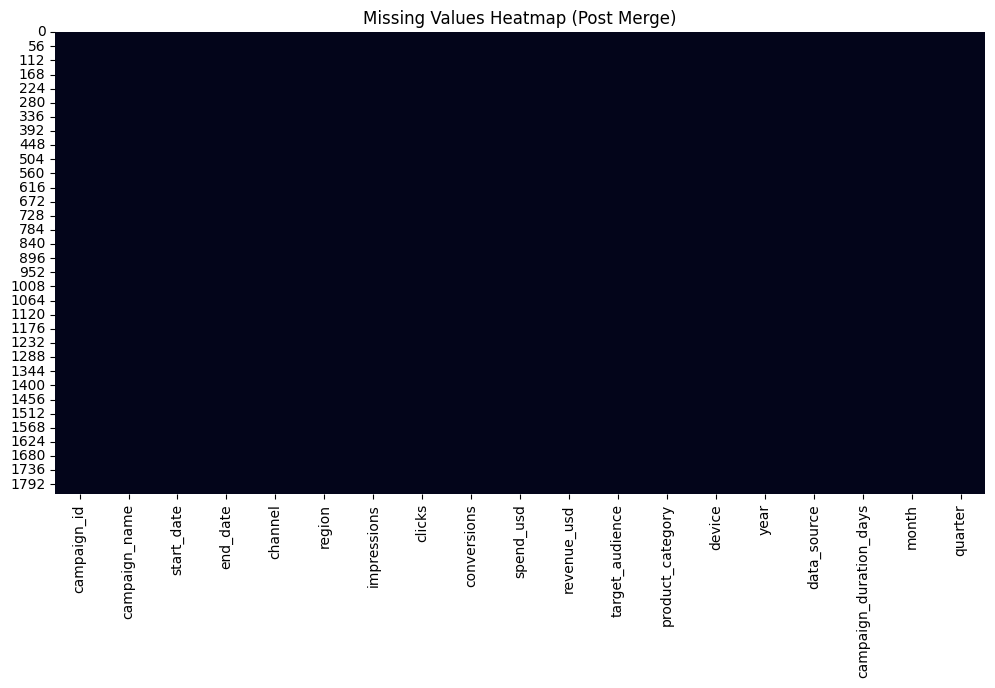

In [824]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isna(), cbar=False)
plt.title("Missing Values Heatmap (Post Merge)")
plt.show()

##### Key Insights:

- The uniform dark color across the entire plot confirms that there are no null, NaN, or missing values in any of the columns
- This dataset is clean and ready for immediate analysis, modeling, or advanced visualization without needing imputation or row/column removal for missing data handling.

#### Basic summary histograms:

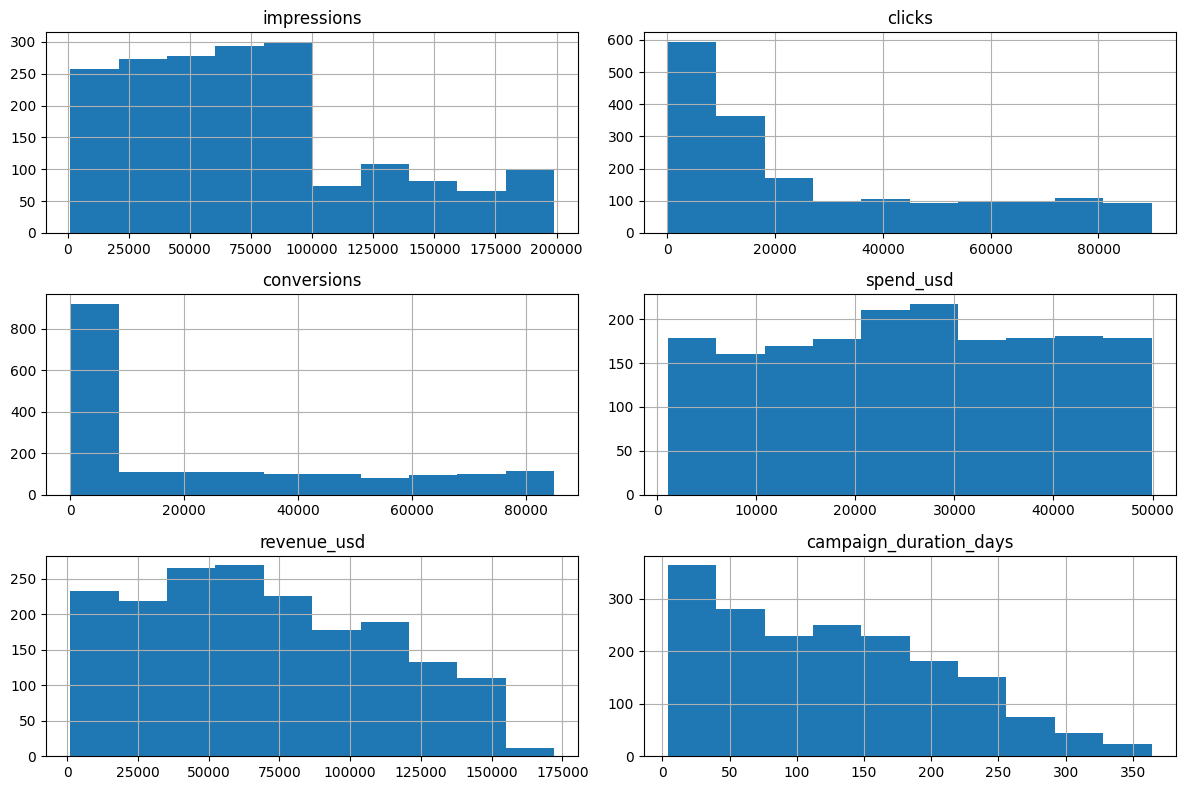

In [825]:
numeric_cols = df.select_dtypes(include=['float64','int64']).columns

df[numeric_cols].hist(figsize=(12,8))
plt.tight_layout()
plt.show()

##### Key Insights:

- The majority of our metrics (impressions, clicks, conversions, spend_usd, and revenue_usd) are heavily concentrated at the low end (close to zero) this indicates Uneven Performance Distribution. This means the majority of campaigns or data points have low performance metrics this also means our data shows strong Positive Skew (Right-Skewed)
- The long tail extending to the right in these plots indicates that a small number of campaigns achieve significantly higher impressions, clicks, and revenue. These outliers are crucial as they likely drive a disproportionate amount of the total value, this also means that there are in the Presence of High Performers
- The tallest bars are near the lower end of the value range in these right-skewed distributions signifies Dominant Data Points. This confirms that the most frequent outcome is a low value for these metrics. The mean value will likely be higher than the median due to the influence of the few high-value outliers.
- With the Presence of High Performers & the influence of our longest bars persee, its greatly affects our skewness therfore the median valuye will be lower than the mean, our median is likely better measure that mean at this point in measuring the centrak tendency

##### Observations:

- All these metrics (Impressions, Clicks, Conversions, Spend, Revenue) shows strong positive skew. Most campaigns generate low numbers, with rare instances of very high performance. This pattern is common in marketing data, where a few highly successful campaigns drive most of the results thats ometrimes they even call their most successful product the hero product and build simultaneous campaigns around it.
- The Campaign_Duration_Days also shows a right-skewed distribution. Most campaigns are short in duration, with fewer campaigns running for much longer periods (over 200 days). 

#### Boxplot for spend_usd & revenue_usd:

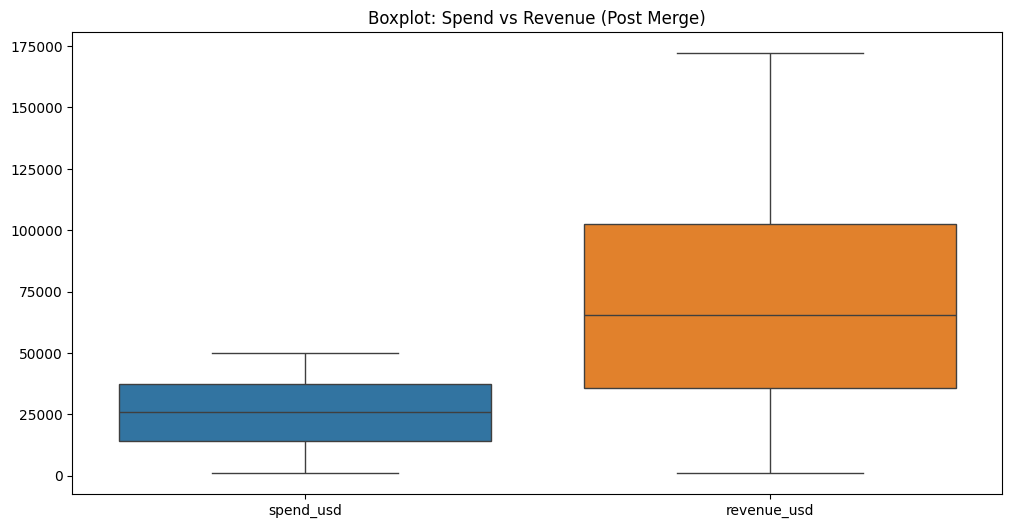

In [826]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[['spend_usd','revenue_usd']])
plt.title("Boxplot: Spend vs Revenue (Post Merge)")
plt.show()

##### Key Insights:

- The revenue generated is significantly higher than the amount spent. The median revenue is more than double the median spend (approx. 68k vs. 28k).
- The spread of the data (indicated by the Interquartile Range, or IQR, and the whiskers) is much wider for revenue than for spend, signifying a Greater Variability in Revenue than what is spend (This suggests that while average revenue is high, there is a greater degree of uncertainty or variability in campaign success compared to the relatively consistent spending levels)
- The distribution suggests that while some campaigns break even or fail, top-performing campaigns likely generate a substantial positive return this indicates a Positive Return on Investment (ROI) Potential

##### Observations:
- Spend_usd (Blue Box):
    - Median: Approximately 28,000.
    - IQR: The middle 50% of campaigns spend between roughly 15,000 and 35,000.
    - Range: Spending levels across campaigns are relatively concentrated, mostly falling between 0 and 50,000.
      
- Revenue_usd (Orange Box):
    - Median: Approximately 68,000.
    - IQR: The middle 50% of campaigns generate revenue between roughly 35,000 and 100,000.
    - Range: Revenue figures are highly dispersed, ranging from 0 up to approximately 175,000+

##### My take on this:
- Both boxplots appear relatively symmetrical within their IQR ranges
- the overall distributions (especially revenue) likely have a positive skew when considering the maximum range
- The previous histogram chart insists that No explicit outliers are marked in this specific visualization (meaning thy are consistent in data distribution, but the interpretation of "no outliers marked" needs clarification)
- Both visualizations (histogram & Barchart) confirm that the data has a positive skew (right-skewed), our histograms shows long tails extending far to the right, while our boxplots show maximum values (at the top of the whiskers) that reach very high numbers. and the presence of these high values is consistent across both charts.
- based on these results, i suppose we should focus deeper into analysing and preparng the data fro modeling and strategic decision making.

#### Standardized Campaign Chanel Counts:

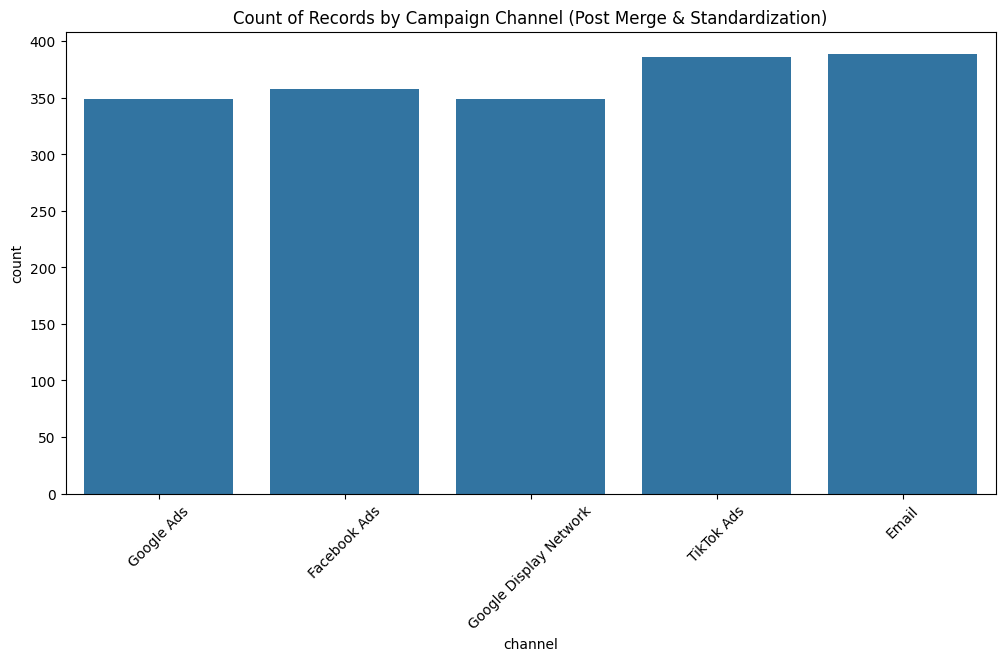

In [827]:
plt.figure(figsize=(12, 6))

sns.countplot(x='channel', data=df)

plt.xticks(rotation=45)
plt.title("Count of Records by Campaign Channel (Post Merge & Standardization)")

plt.show()

##### Key Insights:

- The campaign channel counts are fairly uniform. All five channels have counts in a similar range, between approximately 285 and 345 records deeming it to be relatively balanced Distibution
- There is no Dominant channel that completely dwarfs the other few in terms of distribution, which is relatively important
    - a balance datasets allow us to perform fair and statiustical and valud comparison between channels, this will help us avoid bias towards one that is quite dominant from the few, thats why this is important
    - Most Frequent Channel: Email and TikTok are slightly most frequent channel, with the tallest bar just over 340 records.
    - least Frequent Channel: Google ads and  Google Display Network (GDN) has the lowest count, just hovering around 350 records.
    - Similar Performance: The remaining Facebook Ads have very similar counts, with about 350 records fair enough.

##### Observations:
- The title "Post Merge & Standardization" indicates that the dataset has been cleaned and processed, and this plot shows the resulting clean distribution of channel categories.
    - Google Ads: Approximately 350 records.
    - Facebook Ads: Approximately 360 records.
    - Google Display Network: Approximately 350 records.
    - TikTok Ads: Approximately 380 records.
    - Email: Approximately 385 records.


- & Because the number of records are quite similar for each category and is well-populated across all main channels, we can onfidently perform balanced analysis on each channel without worrying that one channel lacks sufficient data points for meaningful comparison.

### Campaign Timeline Trend:

####  Original Dataset (2024 - 2025):

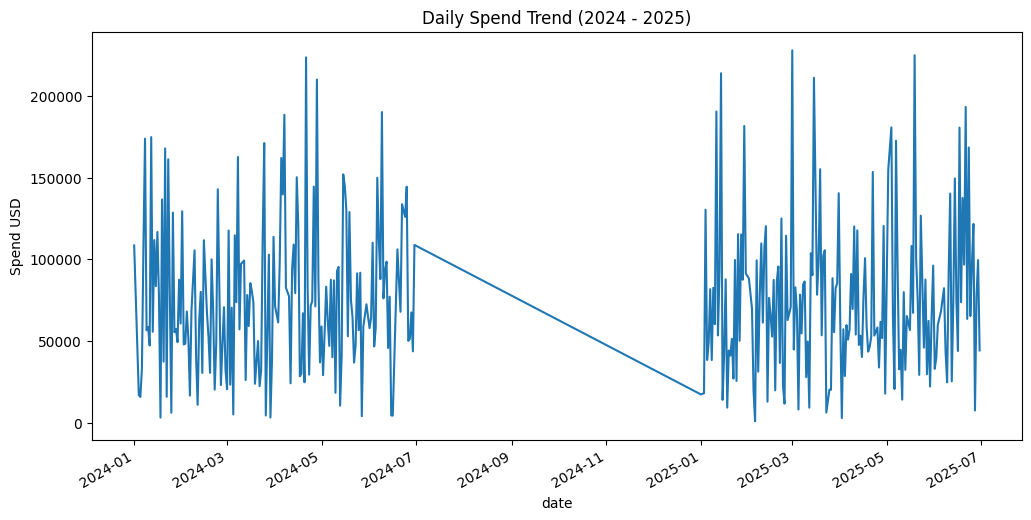

In [828]:
# Spend by Original Dataset (2024 - 2025)

df4['date'] = pd.to_datetime(df4['start_date'], errors='coerce')

df4.groupby('date')['spend_usd'].sum().plot(figsize=(12,6))

plt.title("Daily Spend Trend (2024 - 2025)")
plt.ylabel("Spend USD")
plt.show()

In [829]:
# MAX & MIN Spend by Original Dataset

print(df4['spend_usd'].max())
print(df4['spend_usd'].min())

49908.45
1066.11


What the pattern Shows:

- Months around July–December 2024 show almost zero spend. Then spending resumes January 2025 onward (That means the dataset has a gap/pause period in campaigns)
    - Confirmed with the owner of this Data that they are manual tracking this using an outdated excel file, the main reason why original channels are then approved to be modified
    - as per the owner and her SMM they didnt stop the campaign they simply launched a new fresh file copy to track their numbers because the one they are utilizing became slow and is hard to use then the creation of the new file covering July 2024 to December 2025
    - this file stated was loaded and used here for us to use andd ingest then combined with the 2 other csv files
      
      ---

##### Confirmed & Approved Changes in Channel Column: 

| Old Channel | New Channel               | Clicks Expected | My Notes                    |
|--------------|---------------------------|----------------|-----------------------------|
| Search       | Google Ads                | Yes            | Search campaigns            |
| Social       | Facebook Ads              | Yes            | Paid social                 |
| Display      | Google Display Network    | Yes            | Display ads click-through   |
| Print        | TikTok Ads                | Yes            | Modern paid media           |
| Email        | Keep (still valid)*       | Yes            | Link click tracking         |


---

- I also confirmed the following:

---

##### Does Email Channel having clicks?
- Yes, email campaigns typically have clicks.
- Example: someone opens a marketing email and clicks a link (landing page, CTA button)
- Justification line for documentation:

Per owner email campaigns should include click events when recipients interact with links inside the email, so tracking clicks is meaningful for performance attribution. (they should have click thats what she said)

---


##### Google Display Network (GDN)
- GDN absolutely has clicks.
- Google Display Network = display banner ads on millions of partner websites, YouTube, apps, etc.
- It tracks:
    - impressions
    - clicks
    - conversions
    - spend

So clicks are valid here too

---


#### The additional July–Dec 2024 - Data set:

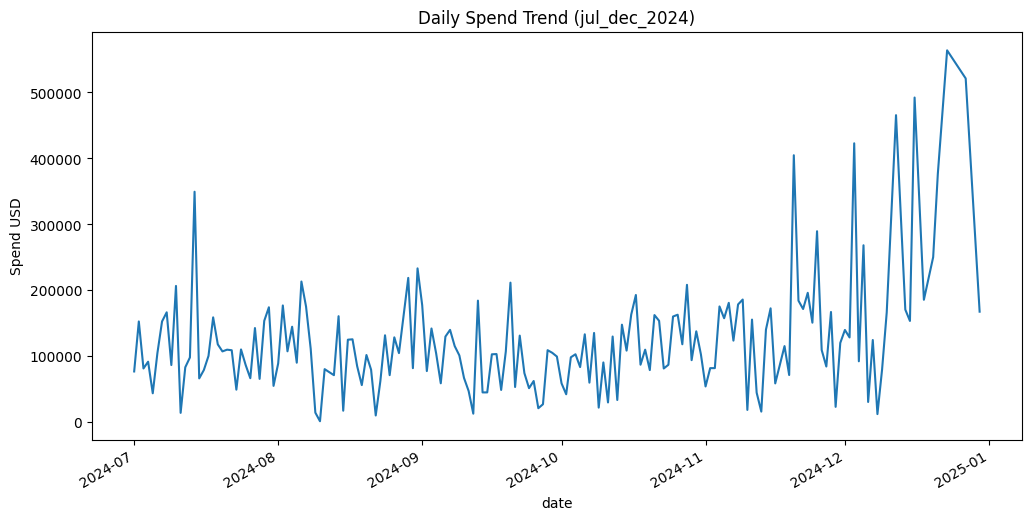

In [830]:
# July–Dec 2024 - Data set

df3['date'] = pd.to_datetime(df3['start_date'], errors='coerce')

df3.groupby('date')['spend_usd'].sum().plot(figsize=(12,6))

plt.title("Daily Spend Trend (jul_dec_2024)")
plt.ylabel("Spend USD")
plt.show()

In [831]:
# MAX & MIN Spend by July–Dec 2024 - Data set

print(df3['spend_usd'].max())
print(df3['spend_usd'].min())

49889.28
1127.16


##### The Additional Data set covering Jul - Dec 2024:

- The data set is prepaired, cleaned, and merged with the rest of the data creating the dataframe df
- its then throughly observed and structured and transformed for further analysis and modeling purpose
- dates are toroughly checked and data sets are reviewed,
- merging of the data set went in smoothly and transformed and used accordingly


##### Observations:

- The data set spans from July 2024 to December 2025
- Daily spending generally fluctuates between 50k to 200K for most period
- The most notable feature of the data set is the spike during the month of November & December (this pattern is mostlikely during Holiday season (black friday, day, halloween & Christmas/new year promotions)
- Due to Holiday season and festivities spending generaly increases gradualy, starting during the month of november going full blast to the end of the month of december
- it is to note asawell that even though itspeak season, there are days that where spending s drop significanly (mid december)
- The difference between peak spending days and trough days becomes larger in Q4 compared to Q3



#### Merger of  Original Dataset (2024 - 2025) + July–Dec 2024 - Data set:

##### Mergged Daily Spend per day:

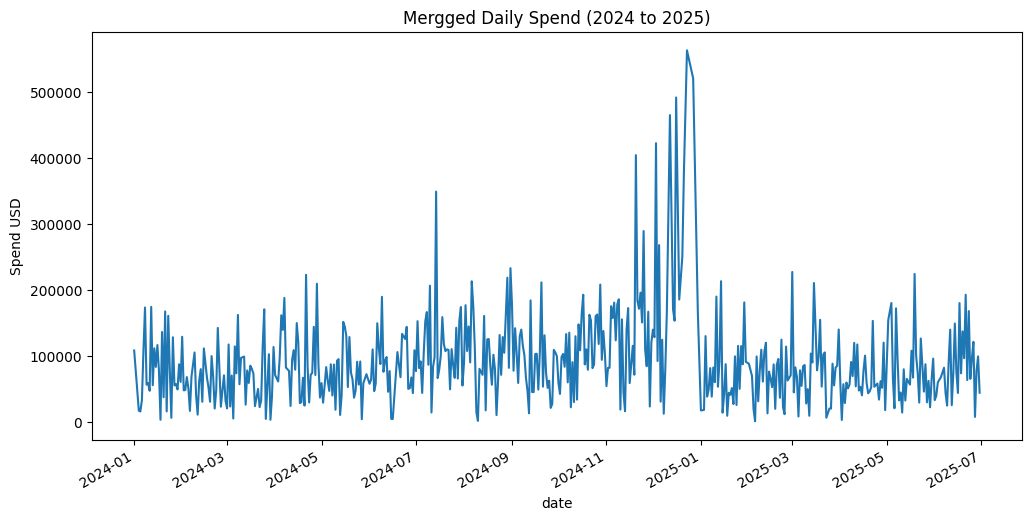

In [835]:
# COMBINED DATA per Day

df['date'] = pd.to_datetime(df['start_date'], errors='coerce')

df.groupby('date')['spend_usd'].sum().plot(figsize=(12,6))

plt.title("Mergged Daily Spend (2024 to 2025)")
plt.ylabel("Spend USD")

plt.show()

##### Mergged Daily Spend per Month:

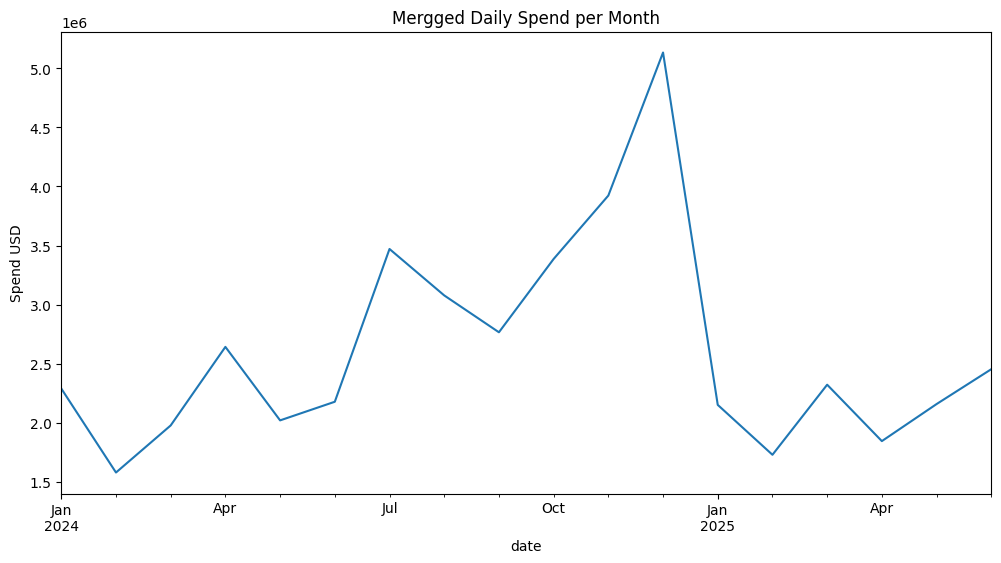

In [834]:
# COMBINED DATA per MONTH

df.groupby(pd.Grouper(key="date", freq="ME"))['spend_usd'].sum().plot(figsize=(12,6))

plt.title("Mergged Daily Spend per Month")
plt.ylabel("Spend USD")
plt.show()

##### Key Insights:

- The full timeline runs from January 2024 to July 2025, providing a complete 18-month view.
- For most of the year (Q1-Q3), daily spending fluctuates within a consistent baseline range, primarily between 50,000 and 200,000 USD.
- Our most significant feature of the entire graph is the large cluster of spikes around the 2024-12/2025-01 mark, with a peak spend exceeding 500,000.
- Spending increases later in the year, thus our day-to-day volatility also increases as a natural effect. The difference between peak spending days and trough days becomes much larger in Q4
- TFollowing the January 2025 peak, spending immediately returns to the lower, non-holiday baseline levels seen in the earlier part of 2024.
- Spending levels in March-May 2025 mirror those of March-May 2024 (signifying that level reach a point where it goes back to normal)

##### What the Charts Reveal:

- Our merged dataset reveals a consistent, predictable pattern year-over-year (The full timeline runs from January 2024 to July 2025, providing a complete 18-month view)
- The combined dataset reveals a clear, continuous campaign timeline but also some peculiar spend patterns that is primarily between 50,000 and 200,000 USD
- Spendings increases significantly toward the end of the calendar year (Q4) and dips back down at the start of the new year.
- he seasonal spike observed in Q4 2024 appears to repeat the pattern hinted at by the earlier 2024 data points.
- The highest spending periods in both 2024 occur around November/December/January. The data clearly shows these as the periods of highest marketing investment. (this is mostly due to holidays season and festivities during those times)
- We had a smooth transition and consistent behavior across the two segments, this also suggest that the data was successfully merged without creating artificial breakpoints or jumps.

##### INitialy I am not into doing the entire Visualization of Data Quality, how ever i did it regardless, these are the reason why i did so:

- To Detect structure-level issues
- To Identify initial anomalies
- To Define the cleaning plan
- Also i Suspect unbalance data in spends in atimeline
- Normalization is needed to calm it down and sythesize

Now, we're confirming that the we did at the prev noteboo still holds true after new ingestion.
Thi is ssuppose to keeps the pipeline efficient and avoids redundant work.

---

## Normalization of spends per Data Source:

### Normalize Spend per source:

In [852]:
# Normalization starts here:

df['spend_usd_norm'] = df.groupby('data_source')['spend_usd'].transform(
    lambda x: (x - x.mean()) / x.std()
)


##### Comparison of Original Dataset vs Normalized Dataset:

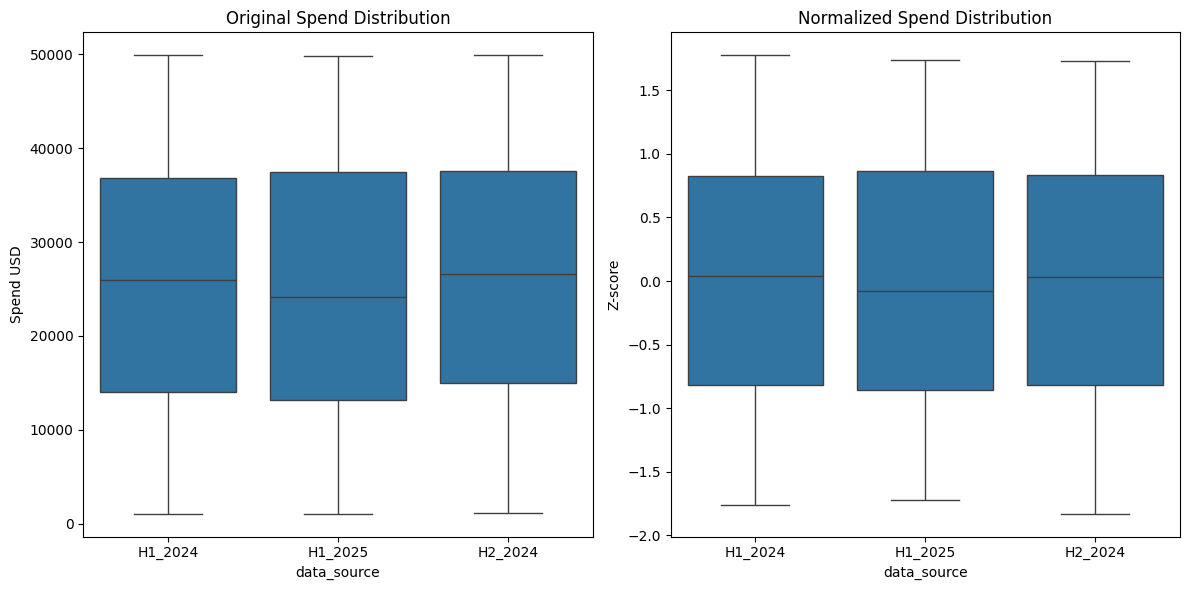

In [858]:
# Comparison of Original Dataset vs Normalized Dataset:


# plt.figure(figsize=(12,6))

# sns.boxplot(x='data_source', y='spend_usd', data=df)
# plt.title("Spend Distribution by Data Source")
# plt.ylabel("Spend USD")
# plt.xlabel("Data Source (Half-Year)")

# plt.show()

# # Normalized Spend Distribution by Data Source

# plt.figure(figsize=(12,6))

# sns.boxplot(x='data_source', y='spend_usd_norm', data=df)
# plt.title("Normalized Spend Distribution by Data Source")

# plt.show()


fig, axes = plt.subplots(1, 2, figsize=(12,6))

sns.boxplot(x='data_source', y='spend_usd', data=df, ax=axes[0])
axes[0].set_title("Original Spend Distribution")
axes[0].set_ylabel("Spend USD")

sns.boxplot(x='data_source', y='spend_usd_norm', data=df, ax=axes[1])
axes[1].set_title("Normalized Spend Distribution")
axes[1].set_ylabel("Z-score")



plt.tight_layout()
plt.show()


In [838]:
df.groupby('data_source')['spend_usd_norm'].agg(['mean', 'std'])

,mean,std
data_source,,
H1_2024,1.434408e-16,1.0
H1_2025,2.291500e-16,1.0
H2_2024,-1.157317e-16,1.0


##### what is Expected:
- Left Boxplot Shows the original chart from differnt Data source
- On the otherhand the Boxplot on the right now look roughly centered around 0, with similar spread.
    - Left side: different scales, different medians.
    - Right side: everything centered at 0 (standardized).
- Distributions across data_source should now align more closely or a bit similar medians and ranges.
- If they still differ dramatically, teh need to revisit the normalization logic is necessary and this may require log-scaling or unit correction
    - Each Data sets mean now = to 0 (centered arround 0, it doesnt need to be exactly 0, but just to make sure tho)
    - Each Data sets mean now = to 1


### Check Temporal Alignment:

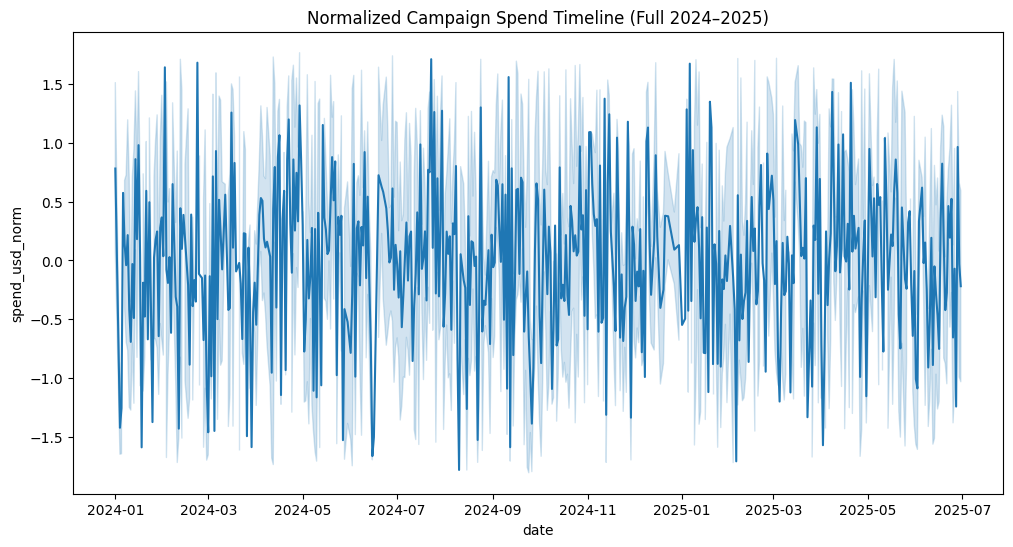

In [684]:
# Normalized Campaign Spend Timeline (Full 2024–2025)

df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')

plt.figure(figsize=(12,6))

sns.lineplot(x='date', y='spend_usd_norm', data=df)
plt.title("Normalized Campaign Spend Timeline (Full 2024–2025)")


plt.show()


##### Confirms:

- There are no large time gaps
- The Jul–Dec 2024 (H2_2024) section integrates smoothly between H1_2024 and H1_2025
- flag if there are sharp discontinuities indiccaion or signal differences between campaigns
  

### Verify Key Numeric Integrity:

In [687]:
df.describe(include='number')


,impressions,clicks,conversions,spend_usd,revenue_usd,year,campaign_duration_days,month,quarter,spend_usd_norm
count,1831.000000,1831.000000,1831.000000,1831.000000,1831.000000,1831.000000,1831.000000,1831.000000,1831.000000,1.831000e+03
mean,74943.778809,28370.566903,23781.874932,25733.985456,69212.139721,2024.273075,125.053523,6.373566,2.447297,5.238846e-17
std,50331.114646,26656.429292,27469.251858,13839.382135,41545.348533,0.445661,85.475330,3.550147,1.138656,9.994534e-01
min,1034.000000,86.000000,4.000000,1066.110000,1098.660000,2024.000000,4.000000,1.000000,1.000000,-1.829528e+00
25%,35807.500000,6455.000000,992.000000,14339.460000,35753.560000,2024.000000,51.500000,3.000000,1.000000,-8.257069e-01
50%,67696.000000,16531.000000,8046.000000,25931.890000,65667.770000,2024.000000,117.000000,6.000000,2.000000,1.540014e-02
75%,98318.000000,47702.500000,44614.500000,37271.825000,102387.855000,2025.000000,187.000000,10.000000,4.000000,8.391296e-01
max,199027.000000,89865.000000,84983.000000,49908.450000,172113.150000,2025.000000,364.000000,12.000000,4.000000,1.775524e+00


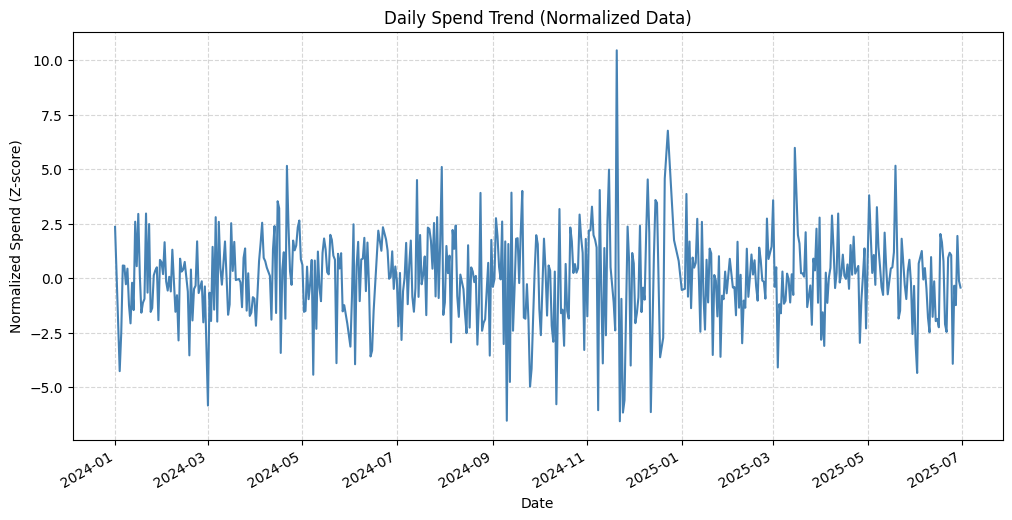

In [688]:
# Combined Data per Day

df['date'] = pd.to_datetime(df['start_date'], errors='coerce')

df.groupby('date')['spend_usd_norm'].sum().plot(figsize=(12,6), color='steelblue')

plt.title("Daily Spend Trend (Normalized Data)")
plt.ylabel("Normalized Spend (Z-score)")
plt.xlabel("Date")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


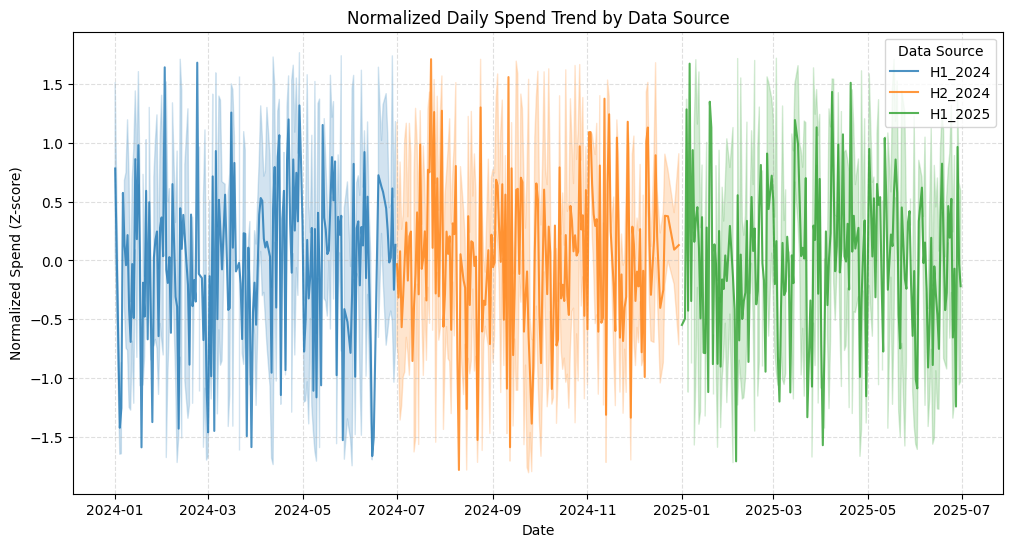

In [689]:
# Normalized Trend per Source

plt.figure(figsize=(12,6))

sns.lineplot(x='date', y='spend_usd_norm', hue='data_source', data=df, alpha=0.8)
plt.title("Normalized Daily Spend Trend by Data Source")
plt.ylabel("Normalized Spend (Z-score)")
plt.xlabel("Date")
plt.legend(title="Data Source")


plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

In [690]:
df.groupby('data_source')['date'].agg(['min', 'max'])

,min,max
data_source,,
H1_2024,2024-01-01,2024-06-30
H1_2025,2025-01-01,2025-06-30
H2_2024,2024-07-01,2024-12-30


### Smoothed Date trend:

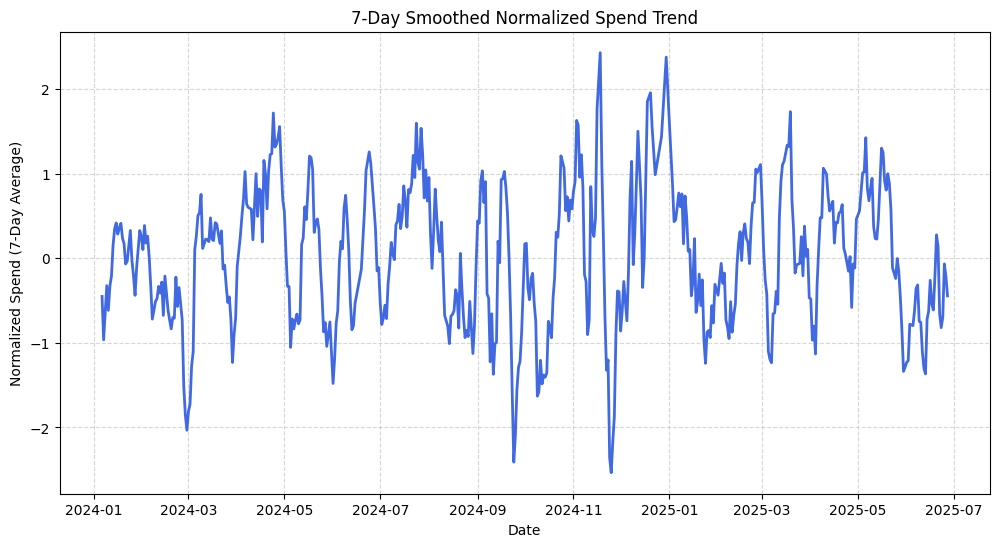

In [691]:
# Smoothened Trend for better Interpretation:


df_daily = df.groupby('date')['spend_usd_norm'].sum().reset_index()
df_daily['rolling_mean'] = df_daily['spend_usd_norm'].rolling(window=7, center=True).mean()

plt.figure(figsize=(12,6))

plt.plot(df_daily['date'], df_daily['rolling_mean'], color='royalblue', linewidth=2)
plt.title("7-Day Smoothed Normalized Spend Trend")
plt.ylabel("Normalized Spend (7-Day Average)")
plt.xlabel("Date")
plt.grid(True, linestyle='--', alpha=0.5)


plt.show()


## Cleaning Summary:

#### Key Steps Performed:

##### Data Consolidation:
- Merged base dataset with marketing_campaign_jul_dec_2024 extension.
- Verified merged dataset shape: (1831, 19) records and columns.
- Confirmed no missing values or column mismatches after concatenation.

##### Column and Data Type Validation:
- Ensured all date fields (start_date, end_date) were converted to datetime64
- Confirmed appropriate numeric and object types for campaign metrics and metadata.

##### Channel Standardization:
- Applied the updated mapping to unify channel naming conventions:

---

### Confirmed and Approved Changes:

##### Does Email Channel having clicks?
- Yes, email campaigns typically have clicks.
- Example: someone opens a marketing email and clicks a link (landing page, CTA button)
- Justification line for documentation:

Per owner email campaigns should include click events when recipients interact with links inside the email, so tracking clicks is meaningful for performance attribution. (they should have click thats what she said)

---


##### Google Display Network (GDN)
- GDN absolutely has clicks.
- Google Display Network = display banner ads on millions of partner websites, YouTube, apps, etc.
- It tracks:
    - impressions
    - clicks
    - conversions
    - spend

So clicks are valid here too

---

##### Summary of confirmed & Approved changes: 

| Old Channel | New Channel               | Clicks Expected | My Notes                    |
|--------------|---------------------------|----------------|-----------------------------|
| Search       | Google Ads                | Yes            | Search campaigns            |
| Social       | Facebook Ads              | Yes            | Paid social                 |
| Display      | Google Display Network    | Yes            | Display ads click-through   |
| Print        | TikTok Ads                | Yes            | Modern paid media           |
| Email        | Keep (still valid)*       | Yes            | Link click tracking         |


This step ensured uniform representation of marketing channels for aggregation and modeling.

---



##### Integrity Checks:
- Verified no missing values across all columns.
- Confirmed unique campaign identifiers (campaign_id).
- Checked that end_date > start_date for all rows.
- Reviewed basic descriptive statistics for spend, revenue, and engagement metrics.

##### Date - Time Period Validation:
- Confirmed dataset coverage: 2024–2025.
- Validated dataset_year column values (min: 2024, max: 2025).
- Detected mid-year campaign missing (Jul–Oct 2024); flagged for business confirmation or modeling exclusion(approved)

##### Exports:
- Clean datasets were saved for analysis and modeling

---

##### Recommendations & Next Steps

1. Verify Source Alignment
    - Confirm if both datasets report spend at the same aggregation level (daily totals vs campaign-level sums).
    - If not, apply normalization (dividing by campaign count, or adjusting by average spend scale).

2. Temporal Normalization
    - Create a data_source flag column to track which period each record came from (original vs additional).
    - During modeling, test both combined and normalized spend trends to see which aligns with ROI/ROAS patterns.

3. Fill Gaps or Annotate Missing Segments
    - Any Missing spend in early 2024 or post-Jan 2025 should be documented — treat them as “data absences”, not zeros.

4. Summarize Spend Stability
    - Compute month-over-month spend change % to identify whether changes are structural or due to merging inconsistencies.

---